In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


df = pd.read_csv("global_inflation_countries.csv")  
df.head()


,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,0.0


In [116]:
print(df.columns)
#to check the columns in the dataset

Index(['country_code', 'country_name', 'region', 'sub_region',
       'intermediate_region', 'indicator_code', 'indicator_name', 'year',
       'inflation_rate'],
      dtype='object')


In [117]:
df.dtypes
#to check the data types of the columns in the dataset

country_code            object
country_name            object
region                  object
sub_region              object
intermediate_region     object
indicator_code          object
indicator_name          object
year                     int64
inflation_rate         float64
dtype: object

In [118]:
print(df.isnull().sum())
#to check the missing values in the dataset

country_code              0
country_name              0
region                 5440
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64


In [119]:
# Fill missing values in 'region' column with the mode of the 'sub_region' column
df["region"] = df.groupby("sub_region")["region"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [120]:
print(df.isnull().sum())

country_code              0
country_name              0
region                 1728
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64


In [121]:
missing_regions = df[df["region"].isnull()]["sub_region"].unique()
print("Sub-regions with missing regions:", missing_regions)


Sub-regions with missing regions: ['WESTERN EUROPE' 'AUSTRALIA AND NEW ZEALAND' 'NORTHERN AMERICA'
 'NORTHERN EUROPE']


In [122]:
sub_region_to_region = {
    "WESTERN EUROPE": "EUROPE",
    "AUSTRALIA AND NEW ZEALAND": "OCEANIA",
    "NORTHERN AMERICA": "AMERICAS",
    "NORTHERN EUROPE": "EUROPE"
}
df["region"] = df["region"].fillna(df["sub_region"].map(sub_region_to_region))


In [123]:
#drop indicater name, code and intermediate region columns
columns_to_drop = ['indicator_name', 'indicator_code', 'intermediate_region']
df = df.drop(columns=columns_to_drop)

In [124]:
print(df.isnull().sum())

country_code      0
country_name      0
region            0
sub_region        0
year              0
inflation_rate    0
dtype: int64


In [125]:
print(f"Duplicate rows: {df.duplicated().sum()}")  # Count duplicate rows


Duplicate rows: 0


In [126]:
#cleaning categorical columns
categorical_cols = [
    "country_code", "country_name", "region", "sub_region", 
     
]

df[categorical_cols] = df[categorical_cols].astype(str)  # Ensure all are strings

# Remove extra spaces and standardize case
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())
#Ensure all values are stored as strings
#Remove extra spaces
#Convert to Title Case (e.g., "afghanistan" → "Afghanistan")
df["country_name"] = df["country_name"].str.title().str.strip()  # Capitalize & remove spaces
df["region"] = df["region"].str.upper()  # Convert to uppercase for uniformity
df["sub_region"] = df["sub_region"].str.title().str.strip()  # Capitalize & remove spaces



In [127]:
import pycountry
# Function to convert Spanish country names to English
def translate_country(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        return country.name  # Returns the English name
    except LookupError:
        return country_name  # Return the original name if not found


df["country_name"] = df["country_name"].apply(translate_country)

df["country_name"].nunique()
df.sample(10)

,country_code,country_name,region,sub_region,year,inflation_rate
918,Bhs,Bahamas,AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS ING...,Latin America And The Caribbean,1982,6.012621
1719,Bwa,Botswana,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2015,3.062032
1004,Bhr,Bahrein,ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,Western Asia,2004,2.352941
12710,Tgo,Togo,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1998,0.975338
2725,Cog,"Congo, Republica Del",ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1997,0.000000
10111,Pol,Polonia,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Eastern Europe,2023,11.528913
5663,Ind,India,ASIA MERIDIONAL,Southern Asia,1991,13.870246
12897,Tun,Tunez,ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,Northern Africa,1993,3.974956
10707,Lao,Republica Democratica Popular Lao,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,South-Eastern Asia,1979,0.000000
4532,Gab,Gabon,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2012,2.652418


In [128]:
year_description = df["year"].describe()
year_description

count    13760.000000
mean      1991.500000
std         18.473624
min       1960.000000
25%       1975.750000
50%       1991.500000
75%       2007.250000
max       2023.000000
Name: year, dtype: float64

In [129]:

inflation_description = df["inflation_rate"].describe()
inflation_description

count    13760.000000
mean        14.733366
std        258.045563
min        -17.640424
25%          0.000000
50%          1.807483
75%          6.694660
max      23773.131774
Name: inflation_rate, dtype: float64

In [130]:
#mean	14.73	#The average inflation rate across all records.
#std (standard deviation)	258.04	High standard deviation suggests extreme variations in inflation rates, likely due to outliers.
#min	-17.64	The lowest inflation rate in your dataset (possible deflation).
#25% (Q1)	0.00	The first quartile (25% of data is below this). Many countries had zero or very low inflation.
#50% (median, Q2)	1.81	The middle value of inflation rates (half are below, half are above). Most inflation rates are low.
#75% (Q3)	6.69	The third quartile (75% of the data is below this). Only 25% of the data has inflation rates above ~6.7%.
#max	23,773.13	The highest inflation rate—a massive outlier.

In [131]:
#show the top 1% extreme values.
outliers = df[df["inflation_rate"] > df["inflation_rate"].quantile(0.99)]
outliers

,country_code,country_name,region,sub_region,year,inflation_rate
96,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,1992,226.005421
288,Ago,Angola,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1992,299.509804
289,Ago,Angola,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1993,1378.527607
290,Ago,Angola,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1994,949.792531
291,Ago,Angola,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1995,2666.450593
...,...,...,...,...,...,...
13661,Zmb,Zambia,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1989,123.404255
13664,Zmb,Zambia,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1992,165.706527
13665,Zmb,Zambia,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,1993,183.312041
13755,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,2019,255.304991


In [132]:
#Hypothesis1: 
#Inflation rates tend to increase or decrease in certain decades due to global economic events (e.g., oil crises in the 1970s, financial crises in 2008).
#answer : inflation rates are significantly diffrent through the decades

In [133]:
import matplotlib.pyplot as plt


# Create a new column for decades
df['decade'] = (df['year'] // 10) * 10

In [134]:
# Group by decade and calculate mean inflation rate
decade_avg = df.groupby('decade')['inflation_rate'].mean().reset_index()
decade_avg

,decade,inflation_rate
0,1960,2.539358
1,1970,6.339782
2,1980,19.356849
3,1990,52.742258
4,2000,5.831910
5,2010,4.419643
6,2020,7.659361


Text(0.5, 1.0, 'Global Inflation Trends by Decade')

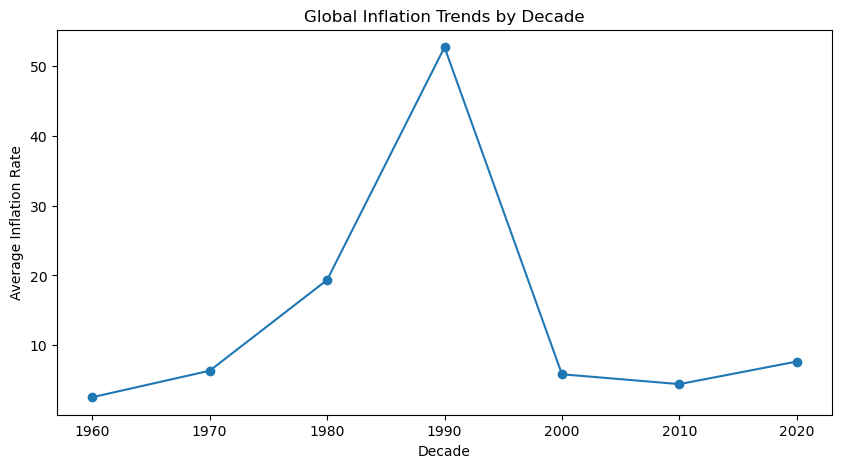

In [135]:

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(decade_avg['decade'], decade_avg['inflation_rate'], marker='o', linestyle='-')
plt.xlabel("Decade")
plt.ylabel("Average Inflation Rate")
plt.title("Global Inflation Trends by Decade")


In [136]:
#Shows which decades had significant inflation differences.
from itertools import combinations
from scipy.stats import mannwhitneyu

# Get unique decades
decades = df["decade"].unique()

# Compare each decade pair
for d1, d2 in combinations(decades, 2):
    group1 = df[df["decade"] == d1]["inflation_rate"].dropna()
    group2 = df[df["decade"] == d2]["inflation_rate"].dropna()
    
    if len(group1) > 1 and len(group2) > 1:  # to ensure valid sample size
        u_stat, p_value = mannwhitneyu(group1, group2)
        print(f"Comparison: {d1} vs {d2} → P-value: {p_value}")
        
        if p_value < 0.05:
            print(f"✅ Inflation rates are significantly different between {d1} and {d2}.\n")
        else:
            print(f"❌ No significant difference between {d1} and {d2}.\n")


Comparison: 1960 vs 1970 → P-value: 6.152330863890845e-51
✅ Inflation rates are significantly different between 1960 and 1970.

Comparison: 1960 vs 1980 → P-value: 2.6173445161746867e-79
✅ Inflation rates are significantly different between 1960 and 1980.

Comparison: 1960 vs 1990 → P-value: 9.806895111761906e-135
✅ Inflation rates are significantly different between 1960 and 1990.

Comparison: 1960 vs 2000 → P-value: 9.427849349884131e-166
✅ Inflation rates are significantly different between 1960 and 2000.

Comparison: 1960 vs 2010 → P-value: 3.7460681723420126e-131
✅ Inflation rates are significantly different between 1960 and 2010.

Comparison: 1960 vs 2020 → P-value: 4.739474104559662e-100
✅ Inflation rates are significantly different between 1960 and 2020.

Comparison: 1970 vs 1980 → P-value: 3.275907018974543e-05
✅ Inflation rates are significantly different between 1970 and 1980.

Comparison: 1970 vs 1990 → P-value: 2.5973884537386354e-19
✅ Inflation rates are significantly dif

In [137]:
# Dictionary to map Spanish region names to English
region_translation = {
    "ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRESOS)": "Sub-Saharan Africa",
    "AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS INGRESOS)": "Latin America & Caribbean",
    "EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)": "Europe & Central Asia",
    "ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTOS INGRESOS)": "Middle East & North Africa ",
    "ASIA MERIDIONAL": "South Asia",
    "EUROPE": "Europe",
    "OCEANIA": "Oceania",
    "ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS INGRESOS)": "East Asia & Pacific",
    "AMERICAS": "Americas"
}


df["region"] = df["region"].map(region_translation)


In [138]:
df["region"]

0                South Asia
1                South Asia
2                South Asia
3                South Asia
4                South Asia
                ...        
13755    Sub-Saharan Africa
13756    Sub-Saharan Africa
13757    Sub-Saharan Africa
13758    Sub-Saharan Africa
13759    Sub-Saharan Africa
Name: region, Length: 13760, dtype: object

In [139]:
#hypothsis2:
#Countries within the same region experience similar inflation trends due to shared economic policies.

# Calculate the average inflation rate for each region
region_avg = df.groupby('region')['inflation_rate'].mean().sort_values(ascending=False)
region_avg


region
Sub-Saharan Africa             22.280244
Latin America & Caribbean      21.281314
Europe & Central Asia          21.199742
Middle East & North Africa      7.310417
South Asia                      5.609285
Europe                          5.542207
Oceania                         5.068353
East Asia & Pacific             4.319596
Americas                        1.878415
Name: inflation_rate, dtype: float64

In [140]:
# Group by region and year, then calculate mean and standard deviation of inflation
region_inflation = df.groupby(["region", "year"])["inflation_rate"].agg(["mean", "std"]).reset_index()

# Rename columns for clarity
region_inflation.rename(columns={"mean": "avg_inflation", "std": "inflation_variability"}, inplace=True)

# Display the results
region_inflation.sample(10)


,region,year,avg_inflation,inflation_variability
78,East Asia & Pacific,1974,8.368887,12.413862
496,South Asia,2008,14.599618,7.318241
261,Latin America & Caribbean,1965,2.458416,9.039857
277,Latin America & Caribbean,1981,13.975357,19.932512
447,Oceania,2023,5.665089,0.096271
486,South Asia,1998,7.206391,5.306840
391,Oceania,1967,4.767590,1.823387
201,Europe & Central Asia,1969,0.691111,1.819807
101,East Asia & Pacific,1997,4.977896,8.618038
330,Middle East & North Africa,1970,1.582074,2.816915


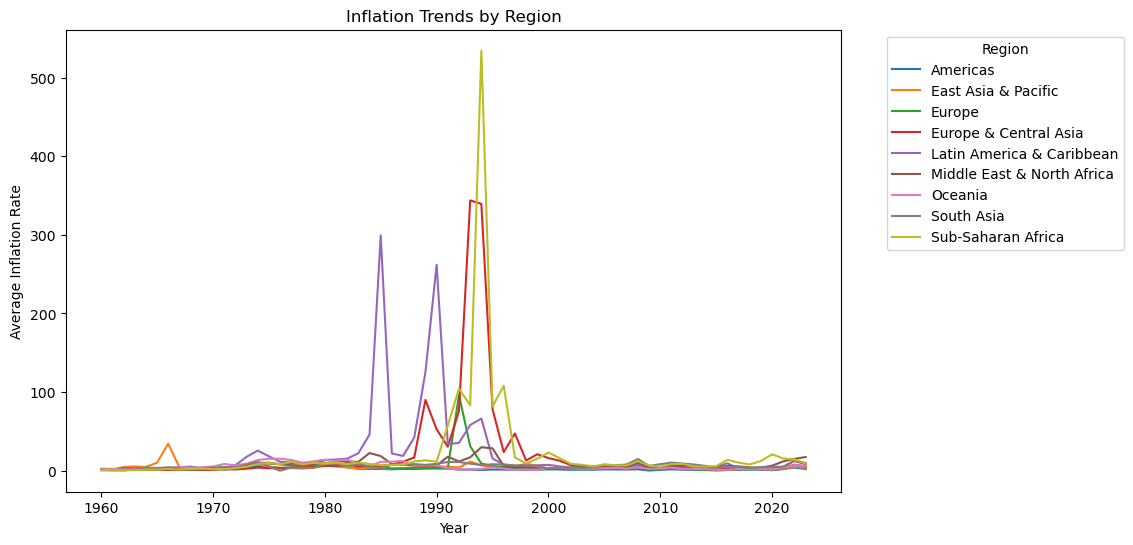

In [141]:

import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each region's inflation trend over time
sns.lineplot(data=region_inflation, x="year", y="avg_inflation", hue="region")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Inflation Rate")
plt.title("Inflation Trends by Region")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [143]:
# Create the pivot table
pivot_table = df.pivot_table(
    values='inflation_rate',
    index='decade',
    columns='region',
    aggfunc='max'
)
# Get the top 3 inflation rates per decade
top_3_per_decade = pivot_table.apply(lambda x: x.nlargest(1), axis=1)
# Reset the index to make decade a column
result = top_3_per_decade.reset_index()
# Melt the dataframe to get countries as a column
result_melted = result.melt(
    id_vars=['decade'],
    var_name='region',
    value_name='inflation_rate'
)
# Sort values and drop any NaN entries
final_result = result_melted.sort_values(
    ['decade', 'inflation_rate'],
    ascending=[True, False]
).dropna()
print(final_result)

    decade                     region  inflation_rate
0     1960        East Asia & Pacific     1136.254112
8     1970  Latin America & Caribbean      504.738541
9     1980  Latin America & Caribbean    11749.639632
17    1990         Sub-Saharan Africa    23773.131774
18    2000         Sub-Saharan Africa      513.906844
19    2010         Sub-Saharan Africa      379.999586
20    2020         Sub-Saharan Africa      557.201817


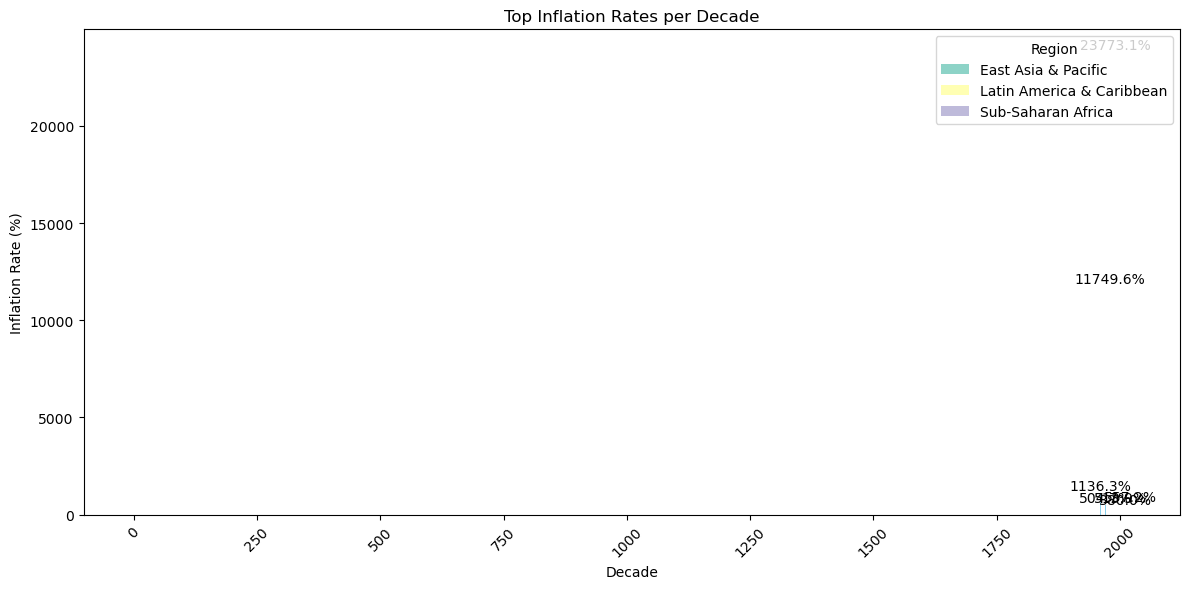

In [144]:
#visualize the top 3 inflation rates per decade
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(final_result['decade'], final_result['inflation_rate'], color='skyblue')

# Customize the chart
plt.title('Top Inflation Rates per Decade')
plt.xlabel('Decade')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)

# Add region labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.1f}%", ha='center', va='bottom')

# Add a legend
for i, region in enumerate(final_result['region'].unique()):
    plt.bar(0, 0, color=plt.cm.Set3(i), label=region)
plt.legend(title='Region', loc='upper right')

plt.tight_layout()
plt.show()


In [148]:
# Identify significant events or trends
# Group by decade and calculate statistics
decade_stats = df.groupby('decade').agg({
    'inflation_rate': ['mean', 'min', 'max']
})

# Flatten column names
decade_stats.columns = ['mean_inflation', 'min_inflation', 'max_inflation']

# Reset index to make decade a column
decade_stats = decade_stats.reset_index()

for _, row in decade_stats.iterrows():
    decade = row['decade']
    mean = row['mean_inflation']
    max_inf = row['max_inflation']
    min_inf = row['min_inflation']
    
    print(f"\n{decade}s:")
    print(f"  Average inflation: {mean:.2f}%")
    print(f"  Range: {min_inf:.2f}% to {max_inf:.2f}%")
    
    if max_inf > 10:
        print("  Notable high inflation period")
    elif min_inf < 0:
        print("  Period includes deflation")
    elif max_inf - min_inf > 5:
        print("  High volatility in inflation rates")


1960.0s:
  Average inflation: 2.54%
  Range: -10.03% to 1136.25%
  Notable high inflation period

1970.0s:
  Average inflation: 6.34%
  Range: -8.40% to 504.74%
  Notable high inflation period

1980.0s:
  Average inflation: 19.36%
  Range: -17.64% to 11749.64%
  Notable high inflation period

1990.0s:
  Average inflation: 52.74%
  Range: -16.12% to 23773.13%
  Notable high inflation period

2000.0s:
  Average inflation: 5.83%
  Range: -16.86% to 513.91%
  Notable high inflation period

2010.0s:
  Average inflation: 4.42%
  Range: -4.29% to 380.00%
  Notable high inflation period

2020.0s:
  Average inflation: 7.66%
  Range: -6.69% to 557.20%
  Notable high inflation period
